In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn import svm

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 'filtered_name' is the file which contains FFW and phenotype features
xls=pd.read_csv('filtered_name.csv')

In [4]:
xls.head()

Unnamed: 0          SPECIES     COMNM MATNM  LCCD  PLTID TRLID BLOCK COL  \
0           0  Cannabis sativa  Cannabis  Kush  NZPN      1   CB1     A   A   
1           2  Cannabis sativa  Cannabis  Kush  NZPN      3   CB1     A   A   
2           4  Cannabis sativa  Cannabis  Kush  NZPN      5   CB1     A   B   
3           6  Cannabis sativa  Cannabis  Kush  NZPN      7   CB1     A   B   
4           7  Cannabis sativa  Cannabis  Kush  NZPN      8   CB1     A   B   

   ROW  ... DANT.L9_49 DNBI.L9_49 DCHL.L10_49  DFLA.L10_49  DANT.L10_49  \
0    1  ...      0.156      24.45         NaN          NaN          NaN   
1    3  ...      0.154      21.22      36.376        2.094        0.184   
2    1  ...      0.186      16.00         NaN          NaN          NaN   
3    3  ...      0.125      18.85      35.393        2.138        0.132   
4    4  ...      0.165      17.04      32.485        2.130        0.201   

   DNBI.L10_49  DCHL.L11_49  DFLA.L11_49  DANT.L11_49  DNBI.L11_49  
0          NaN          NaN          NaN          NaN          NaN  
1        17.37          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3        16.56          NaN          NaN          NaN          NaN  
4        15.25          NaN          NaN          NaN          NaN  

[5 rows x 192 columns]

In [5]:
Kush_xls=xls[(xls['MATNM']=='Kush')]
Angel_xls=xls[(xls['MATNM']=='Angel')]

In [6]:
# Remove null feature columns from angel and kyush
null_cols_angel = Angel_xls.columns[Angel_xls.isnull().any()]
Angel_xls.drop(null_cols_angel, axis=1, inplace=True)

null_cols_kush = Kush_xls.columns[Kush_xls.isnull().any()]
Kush_xls.drop(null_cols_kush, axis=1, inplace=True)

c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
# remove those columns which are not features
Kush_xls1=Kush_xls.iloc[:,15:]
Angel_xls1=Angel_xls.iloc[:,15:]

In [9]:
Kush_xls1.head()

FWFR_91    INL_21    INL_14  DCHL.L1_14  DFLA.L1_14  DANT.L1_14  \
0   10.605  0.769231  0.444444      28.941       1.548       0.134   
1   13.974  0.666667  0.476190      27.385       1.387       0.147   
2   11.400  0.533333  0.333333      32.379       1.603       0.117   
3    8.843  0.545455  0.400000      32.837       1.621       0.143   
4    8.687  0.615385  0.400000      30.535       1.573       0.123   

   DNBI.L1_14  PLTHGT_7  PLTHGT_14  PLTHGT_21  ...  DFLA.L1_28  DFLA.L2_28  \
0       18.69       2.8        4.5        6.5  ...       1.368       1.450   
1       19.74       3.2        4.2        7.5  ...       1.586       1.305   
2       20.20       4.2        6.0        7.5  ...       1.533       1.550   
3       20.25       3.0        5.0        5.5  ...       1.575       1.439   
4       19.41       3.4        5.0        6.5  ...       1.586       1.184   

   DFLA.L3_28  DFLA.L4_28  DFLA.L5_28  DANT.L1_28  DANT.L2_28  DANT.L3_28  \
0       1.543       1.700       1.582       0.143       0.152       0.143   
1       1.695       1.967       2.177       0.182       0.168       0.170   
2       1.806       2.073       1.920       0.170       0.170       0.161   
3       1.589       1.772       1.498       0.163       0.166       0.156   
4       1.504       1.664       1.975       0.152       0.252       0.152   

   DANT.L4_28  DANT.L5_28  
0       0.180       0.154  
1       0.159       0.185  
2       0.166       0.134  
3       0.154       0.134  
4       0.166       0.143  

[5 rows x 48 columns]

In [10]:
Angel_xls1.head()

FWFR_91    INL_21    INL_14  DCHL.L1_14  DFLA.L1_14  DANT.L1_14  \
44    6.341  0.571429  0.400000      43.310       1.069       0.184   
45    4.862  0.571429  0.400000      25.314       1.528       0.170   
46    2.320  0.727273  0.625000      29.772       1.662       0.158   
47    7.571  0.533333  0.377358      26.854       1.460       0.154   
48   13.606  0.500000  0.363636      35.273       1.565       0.138   

    DNBI.L1_14  PLTHGT_7  PLTHGT_14  PLTHGT_21  ...  DANT.L5_49  DNBI.L5_49  \
44       40.50       2.3        5.0        7.0  ...       0.158       23.21   
45       16.56       3.0        5.0        7.0  ...       0.130       24.72   
46       17.91       2.5        3.2        5.5  ...       0.251       29.05   
47       18.39       4.0        5.3        7.5  ...       0.136       27.52   
48       22.53       3.3        5.5        8.0  ...       0.119       36.52   

    DCHL.L6_49  DFLA.L6_49  DANT.L6_49  DNBI.L6_49  DCHL.L7_49  DFLA.L7_49  \
44      44.603       2.017       0.163       22.12      18.544       1.636   
45      44.386       1.976       0.172       22.46      33.966       1.928   
46      58.661       1.799       0.121       32.60      44.659       1.772   
47      52.009       1.742       0.186       29.85      50.688       1.737   
48      52.430       1.597       0.140       32.84      45.657       1.898   

    DANT.L7_49  DNBI.L7_49  
44       0.158       11.33  
45       0.199       17.62  
46       0.149       25.21  
47       0.091       29.19  
48       0.149       24.06  

[5 rows x 95 columns]

In [11]:
Angel_xls1.columns.intersection(Kush_xls1.columns)

Index(['FWFR_91', 'INL_21', 'INL_14', 'DCHL.L1_14', 'DFLA.L1_14', 'DANT.L1_14',
       'DNBI.L1_14', 'PLTHGT_7', 'PLTHGT_14', 'PLTHGT_21', 'PLTHGT_28',
       'PLTHGT_35', 'PLTHGT_49', 'PLTHGT_56', 'PLTVOL_56', 'PLTHGT_70',
       'PLTVOL_70', 'PLTHGT_77', 'PLTVOL_77', 'INL_28', 'INL_35', 'ILA_14',
       'DCHL.L1_21', 'DCHL.L2_21', 'DCHL.L3_21', 'DFLA.L1_21', 'DFLA.L2_21',
       'DFLA.L3_21', 'DANT.L1_21', 'DANT.L2_21', 'DANT.L3_21', 'DCHL.L1_28',
       'DCHL.L2_28', 'DCHL.L3_28', 'DCHL.L4_28', 'DFLA.L1_28', 'DFLA.L2_28',
       'DFLA.L3_28', 'DFLA.L4_28', 'DANT.L1_28', 'DANT.L2_28', 'DANT.L3_28',
       'DANT.L4_28'],
      dtype='object')

In [12]:
# Use common feature set between angel and kush for data exploration.
new_angel = Angel_xls1.loc[:,Angel_xls1.columns.intersection(Kush_xls1.columns)]
new_angel.head()

FWFR_91    INL_21    INL_14  DCHL.L1_14  DFLA.L1_14  DANT.L1_14  \
44    6.341  0.571429  0.400000      43.310       1.069       0.184   
45    4.862  0.571429  0.400000      25.314       1.528       0.170   
46    2.320  0.727273  0.625000      29.772       1.662       0.158   
47    7.571  0.533333  0.377358      26.854       1.460       0.154   
48   13.606  0.500000  0.363636      35.273       1.565       0.138   

    DNBI.L1_14  PLTHGT_7  PLTHGT_14  PLTHGT_21  ...  DCHL.L3_28  DCHL.L4_28  \
44       40.50       2.3        5.0        7.0  ...      32.396      30.288   
45       16.56       3.0        5.0        7.0  ...      25.057      26.235   
46       17.91       2.5        3.2        5.5  ...      33.315      35.701   
47       18.39       4.0        5.3        7.5  ...      36.802      33.816   
48       22.53       3.3        5.5        8.0  ...      37.793      31.949   

    DFLA.L1_28  DFLA.L2_28  DFLA.L3_28  DFLA.L4_28  DANT.L1_28  DANT.L2_28  \
44       1.686       1.686       1.636       1.994       0.194       0.159   
45       1.504       1.517       1.788       2.221       0.175       0.217   
46       1.543       1.578       1.762       2.019       0.177       0.147   
47       1.551       1.450       1.709       2.014       0.175       0.156   
48       1.527       1.450       1.489       2.003       0.154       0.140   

    DANT.L3_28  DANT.L4_28  
44       0.147       0.194  
45       0.204       0.189  
46       0.139       0.147  
47       0.143       0.161  
48       0.143       0.154  

[5 rows x 43 columns]

In [1]:
# Below are the unique features obtain through LOOCV exhaustive search on kush cultivate  

X_df=new_angel.iloc[:,[ 1,  2,  4,  5,  8,  9, 13, 14, 16, 19, 22, 27, 28, 30, 31, 32, 33, 34]]
y_df=new_angel.iloc[:,0]
print(y_df[:5])
X_df.head()

NameError: name 'new_angel' is not defined

TEST: [0]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


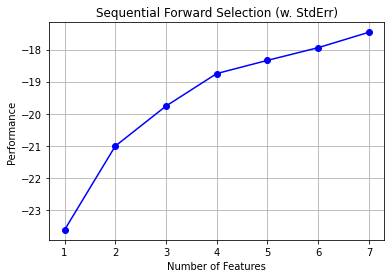

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.46
(44, 7)
TEST: [1]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


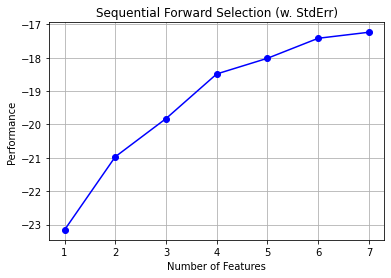

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.23
(44, 7)
TEST: [2]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


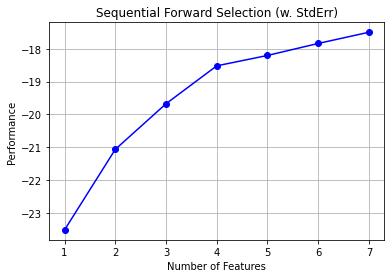

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.50
(44, 7)
TEST: [3]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


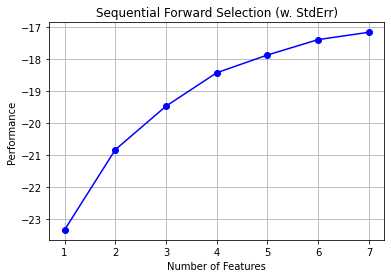

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.17
(44, 7)
TEST: [4]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


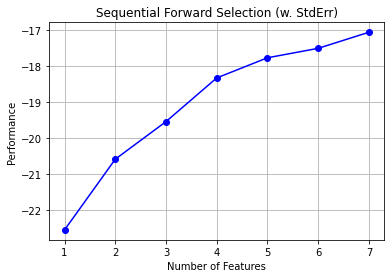

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.06
(44, 7)
TEST: [5]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


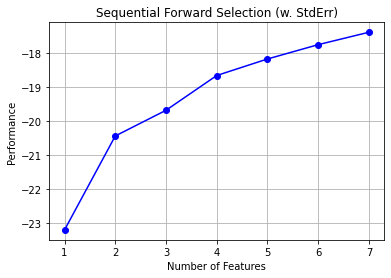

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.40
(44, 7)
TEST: [6]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


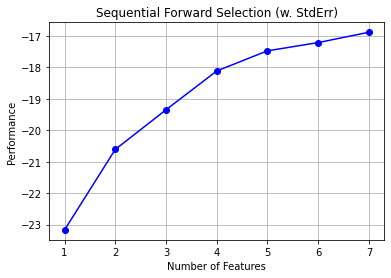

Selected features: (3, 7, 8, 12, 13, 15, 16)
Best MSE score: -16.88
(44, 7)
TEST: [7]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


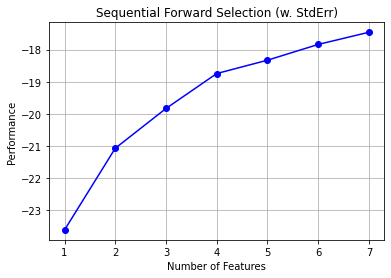

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.46
(44, 7)
TEST: [8]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


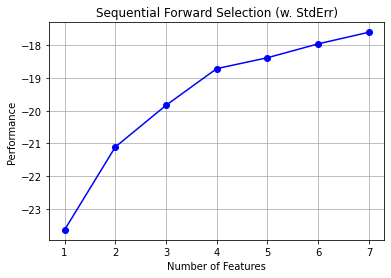

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.60
(44, 7)
TEST: [9]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


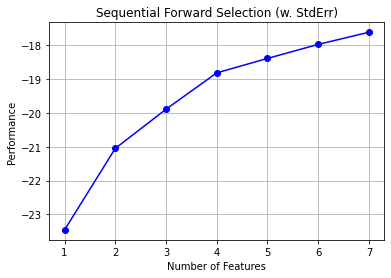

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.62
(44, 7)
TEST: [10]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


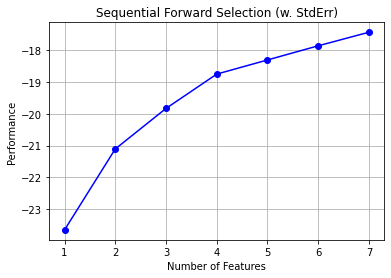

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.45
(44, 7)
TEST: [11]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


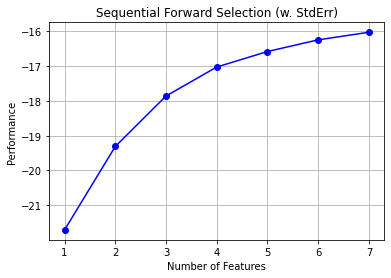

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -16.02
(44, 7)
TEST: [12]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


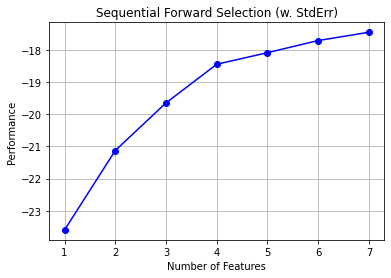

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.45
(44, 7)
TEST: [13]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


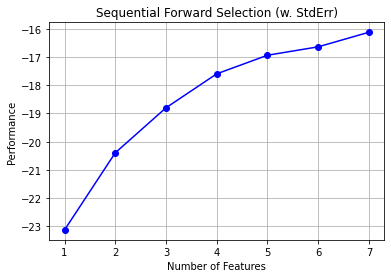

Selected features: (3, 6, 7, 13, 15, 16, 17)
Best MSE score: -16.13
(44, 7)
TEST: [14]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


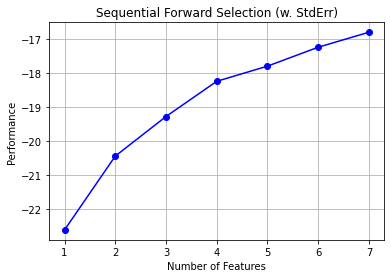

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -16.80
(44, 7)
TEST: [15]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


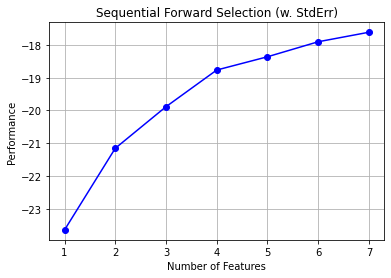

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.61
(44, 7)
TEST: [16]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


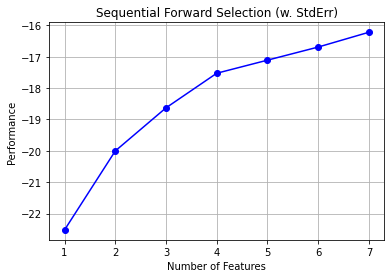

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -16.22
(44, 7)
TEST: [17]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


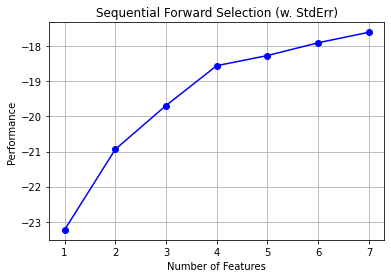

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.60
(44, 7)
TEST: [18]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


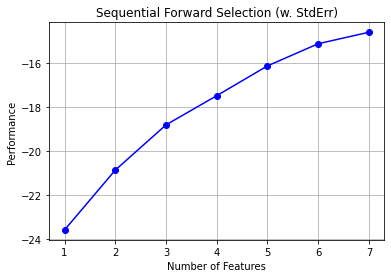

Selected features: (2, 3, 7, 8, 14, 15, 16)
Best MSE score: -14.61
(44, 7)
TEST: [19]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


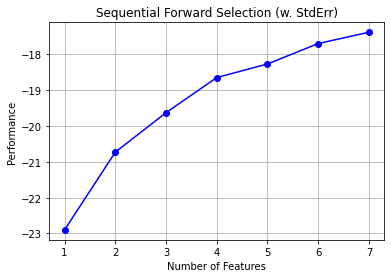

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.38
(44, 7)
TEST: [20]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


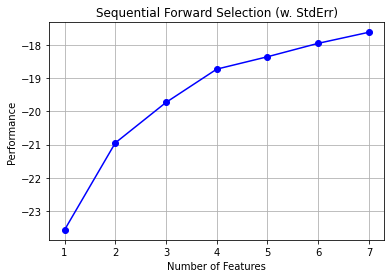

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.61
(44, 7)
TEST: [21]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


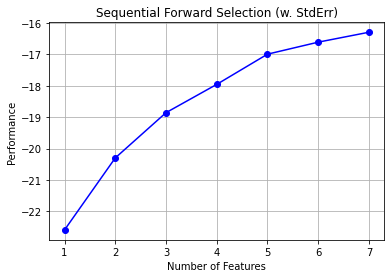

Selected features: (3, 5, 7, 8, 15, 16, 17)
Best MSE score: -16.30
(44, 7)
TEST: [22]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


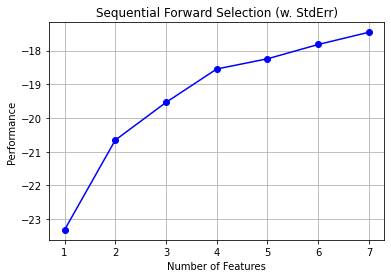

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.46
(44, 7)
TEST: [23]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


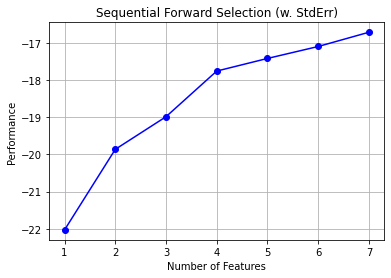

Selected features: (3, 7, 8, 9, 15, 16, 17)
Best MSE score: -16.72
(44, 7)
TEST: [24]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


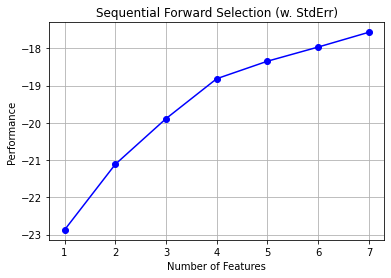

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.57
(44, 7)
TEST: [25]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


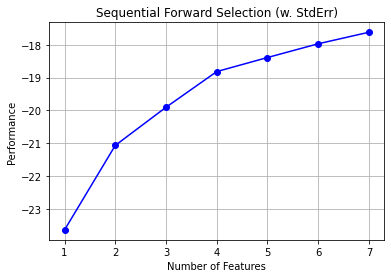

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.62
(44, 7)
TEST: [26]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


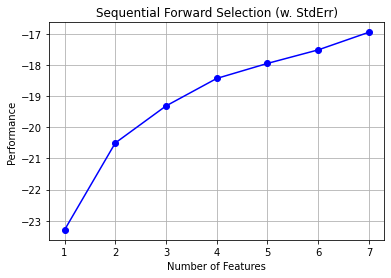

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -16.95
(44, 7)
TEST: [27]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


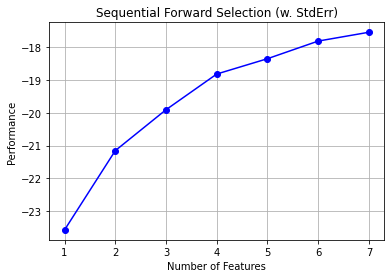

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.54
(44, 7)
TEST: [28]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


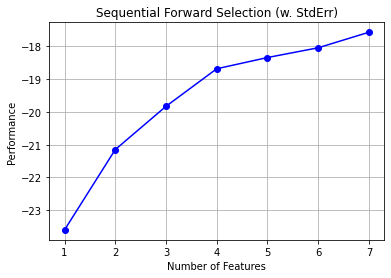

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.57
(44, 7)
TEST: [29]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


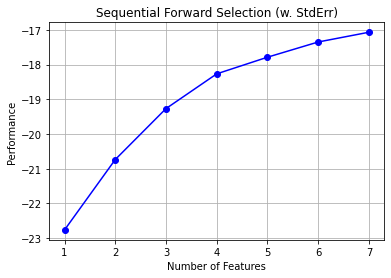

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.07
(44, 7)
TEST: [30]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


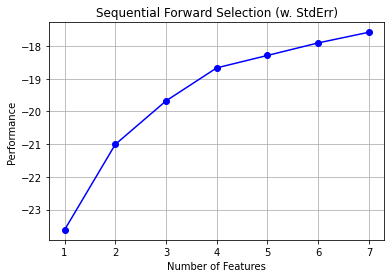

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.58
(44, 7)
TEST: [31]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


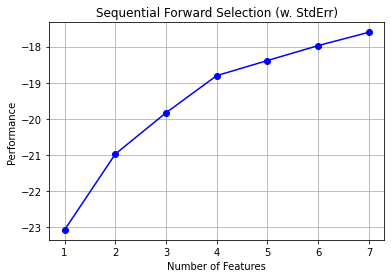

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.60
(44, 7)
TEST: [32]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


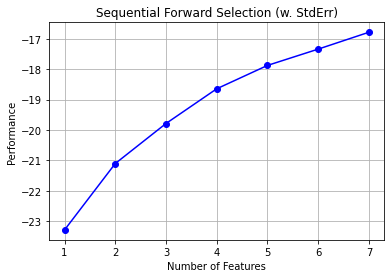

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -16.79
(44, 7)
TEST: [33]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


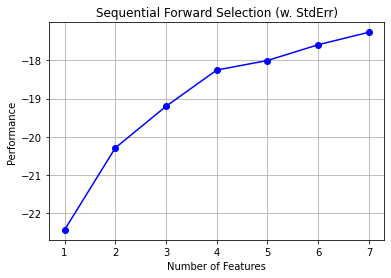

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.26
(44, 7)
TEST: [34]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


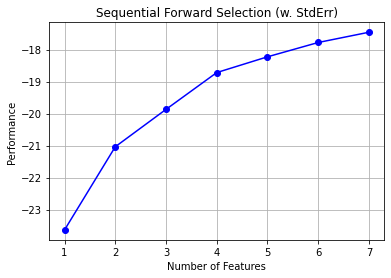

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.46
(44, 7)
TEST: [35]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


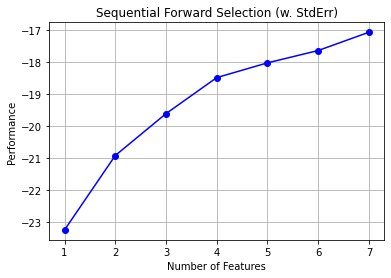

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.06
(44, 7)
TEST: [36]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


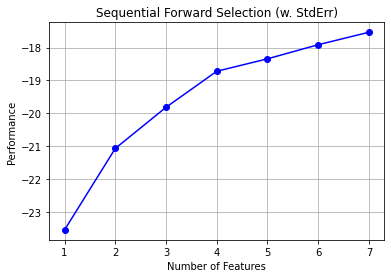

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.53
(44, 7)
TEST: [37]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


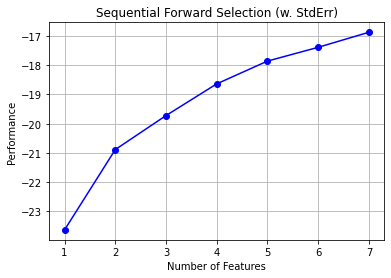

Selected features: (3, 7, 8, 11, 15, 16, 17)
Best MSE score: -16.87
(44, 7)
TEST: [38]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


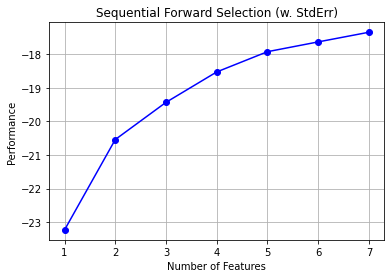

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.34
(44, 7)
TEST: [39]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


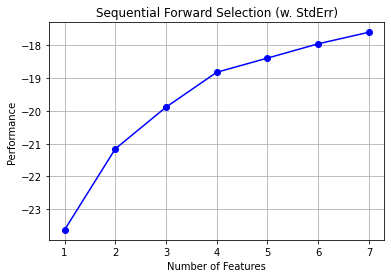

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.60
(44, 7)
TEST: [40]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


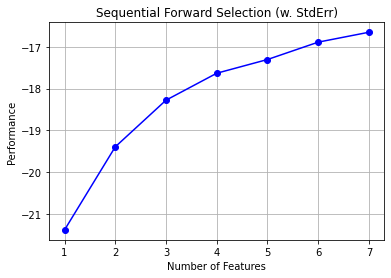

Selected features: (3, 6, 7, 8, 15, 16, 17)
Best MSE score: -16.65
(44, 7)
TEST: [41]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


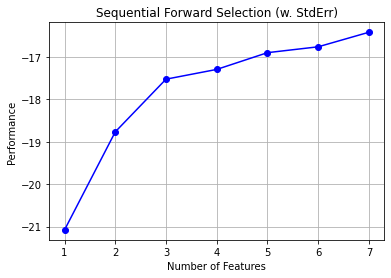

Selected features: (1, 3, 5, 7, 8, 15, 17)
Best MSE score: -16.41
(44, 7)
TEST: [42]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


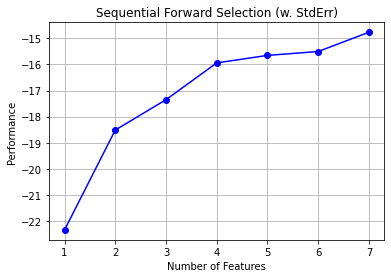

Selected features: (1, 3, 4, 7, 14, 15, 16)
Best MSE score: -14.77
(44, 7)
TEST: [43]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


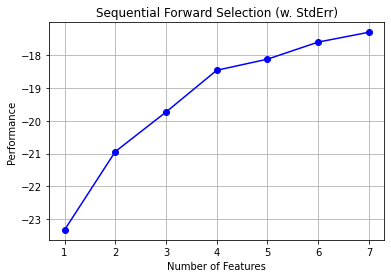

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -17.31
(44, 7)
TEST: [44]


c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\asingh1\pycharmprojects\biolumic\venv\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


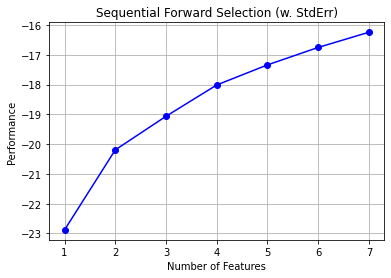

Selected features: (3, 7, 8, 13, 15, 16, 17)
Best MSE score: -16.24
(44, 7)
-0.4044526589374735
42.0401514297816


In [16]:
# %%  leave one out cross validation (loocv) based sequential feature selection
loo = LeaveOneOut()
predi_y = []
all_y = []
index_= []
for train_index, test_index in loo.split(X_df,y_df):
    print("TEST:", test_index)
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    lr = LinearRegression()
    sfs = SFS(lr, 
          k_features=7, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=0)
    sfs = sfs.fit(X_train.values, y_train)
    fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.grid()
    plt.show()
    print('Selected features:', sfs.k_feature_idx_)    
    print('Best MSE score: %.2f' % sfs.k_score_)
    index_.append(sfs.k_feature_idx_)
    
    X_train_efs = X_train.iloc[:,list(sfs.k_feature_idx_)]
    X_test_efs = X_test.iloc[:,list(sfs.k_feature_idx_)]
    print(X_train_efs.shape)
    svr =  LinearRegression() #svm.SVR(kernel='linear')
    svr.fit(X_train_efs, y_train)
    y_pred = svr.predict(X_test_efs)
    predi_y.append(y_pred)
    all_y.append(y_test)

y_cv = np.vstack(predi_y);
y1 = np.vstack(all_y);

score_loocv = r2_score(y1, y_cv);
mse_loocv = mean_squared_error(y1, y_cv)
print(score_loocv)
print(mse_loocv)

In [19]:
X_df.head()

INL_21    INL_14  DFLA.L1_14  DANT.L1_14  PLTHGT_14  PLTHGT_21  \
44  0.571429  0.400000       1.069       0.184        5.0        7.0   
45  0.571429  0.400000       1.528       0.170        5.0        7.0   
46  0.727273  0.625000       1.662       0.158        3.2        5.5   
47  0.533333  0.377358       1.460       0.154        5.3        7.5   
48  0.500000  0.363636       1.565       0.138        5.5        8.0   

    PLTHGT_56  PLTVOL_56  PLTVOL_70    INL_28  DCHL.L1_21  DFLA.L3_21  \
44       41.0    68921.0   156468.0  0.500000      39.548       1.955   
45       33.0    89232.0   178560.0  0.461538      25.007       1.589   
46       24.0    42240.0    64980.0  0.428571       3.194       1.597   
47       40.0   106080.0   208506.0  0.521739      27.518       1.821   
48       32.0    64512.0   148824.0  0.545455       5.245       1.844   

    DANT.L1_21  DANT.L3_21  DCHL.L1_28  DCHL.L2_28  DCHL.L3_28  DCHL.L4_28  
44       0.266       0.220      24.207      29.807      32.396      30.288  
45       0.177       0.212      27.900      26.095      25.057      26.235  
46       0.170       0.182      28.362      35.582      33.315      35.701  
47       0.170       0.194      26.001      31.345      36.802      33.816  
48       0.177       0.204      34.079      35.108      37.793      31.949

In [17]:
X_df1=X_df.iloc[:,list(index_[0])]
X_df1.head()

DANT.L1_14  PLTVOL_56  PLTVOL_70  DANT.L3_21  DCHL.L2_28  DCHL.L3_28  \
44       0.184    68921.0   156468.0       0.220      29.807      32.396   
45       0.170    89232.0   178560.0       0.212      26.095      25.057   
46       0.158    42240.0    64980.0       0.182      35.582      33.315   
47       0.154   106080.0   208506.0       0.194      31.345      36.802   
48       0.138    64512.0   148824.0       0.204      35.108      37.793   

    DCHL.L4_28  
44      30.288  
45      26.235  
46      35.701  
47      33.816  
48      31.949

In [18]:
index_

[(3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 12, 13, 15, 16),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 6, 7, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (2, 3, 7, 8, 14, 15, 16),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 5, 7, 8, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 9, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 17),
 (3, 7, 8, 13, 15, 16, 